<a href="https://colab.research.google.com/github/Manvi1203/PV-Power-Forecasting/blob/main/Time_series_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving merged_dataset.csv to merged_dataset.csv


In [6]:
df.columns

Index(['DATE_TIME\t', 'DC_POWER\t', 'AC_POWER\t', 'time',
       'temperature_2m (°C)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [5]:
df=pd.read_csv('/content/merged_dataset.csv')

In [7]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME\t'], format='%Y-%m-%d %H:%M:%S')
df.drop(['Unnamed: 12', 'Unnamed: 13', 'DATE_TIME\t', 'time'], axis=1, inplace=True)
# Adding separate time and date columns
df["DATE"] = pd.to_datetime(df["DATE_TIME"]).dt.date
df["TIME"] = pd.to_datetime(df["DATE_TIME"]).dt.time
df['DAY'] = pd.to_datetime(df['DATE_TIME']).dt.day
df['MONTH'] = pd.to_datetime(df['DATE_TIME']).dt.month
df['WEEK'] = pd.to_datetime(df['DATE_TIME']).dt.week

# Add hours and minutes for ML models
df['HOURS'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.hour
df['MINUTES'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.minute
df['TOTAL MINUTES PASS'] = df['MINUTES'] + df['HOURS'] * 60

# Add date as a string column
df["DATE_STRING"] = df["DATE"].astype(str)  # Add column with date as string
df["HOURS"] = df["HOURS"].astype(str)
df["TIME"] = df["TIME"].astype(str)

In [8]:
df=df.dropna()

In [9]:
df.head(100)

,DC_POWER\t,AC_POWER\t,temperature_2m (°C),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_100m (km/h),wind_direction_10m (°),DATE_TIME,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,1319.0,1472.0,10.5,0.0,0.0,0,0,0.0,30.0,277.0,2021-01-21 05:30:00,2021-01-21,05:30:00,21,1,3,5,30,330,2021-01-21
4,5229.0,5362.0,13.5,0.0,0.0,0,0,0.0,26.2,280.0,2021-01-21 06:30:00,2021-01-21,06:30:00,21,1,3,6,30,390,2021-01-21
8,11857.0,12128.0,16.1,0.0,0.0,0,0,0.0,26.0,285.0,2021-01-21 07:45:00,2021-01-21,07:45:00,21,1,3,7,45,465,2021-01-21
12,15823.0,16094.0,18.2,0.0,0.0,0,0,0.0,26.2,290.0,2021-01-21 08:45:00,2021-01-21,08:45:00,21,1,3,8,45,525,2021-01-21
16,17981.0,18336.0,19.5,0.0,0.0,0,0,0.0,26.9,292.0,2021-01-21 09:45:00,2021-01-21,09:45:00,21,1,3,9,45,585,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,0.0,7.2,0.0,4.0,4,0,0.0,15.8,279.0,2021-01-25 03:45:00,2021-01-25,03:45:00,25,1,4,3,45,225,2021-01-25
373,0.0,0.0,6.9,0.0,6.0,7,0,0.0,15.8,270.0,2021-01-25 04:45:00,2021-01-25,04:45:00,25,1,4,4,45,285,2021-01-25
376,143.0,252.0,8.9,0.0,4.0,5,0,0.0,15.5,275.0,2021-01-25 05:30:00,2021-01-25,05:30:00,25,1,4,5,30,330,2021-01-25
380,931.0,1093.0,12.8,0.0,1.0,1,0,0.0,11.2,288.0,2021-01-25 06:30:00,2021-01-25,06:30:00,25,1,4,6,30,390,2021-01-25


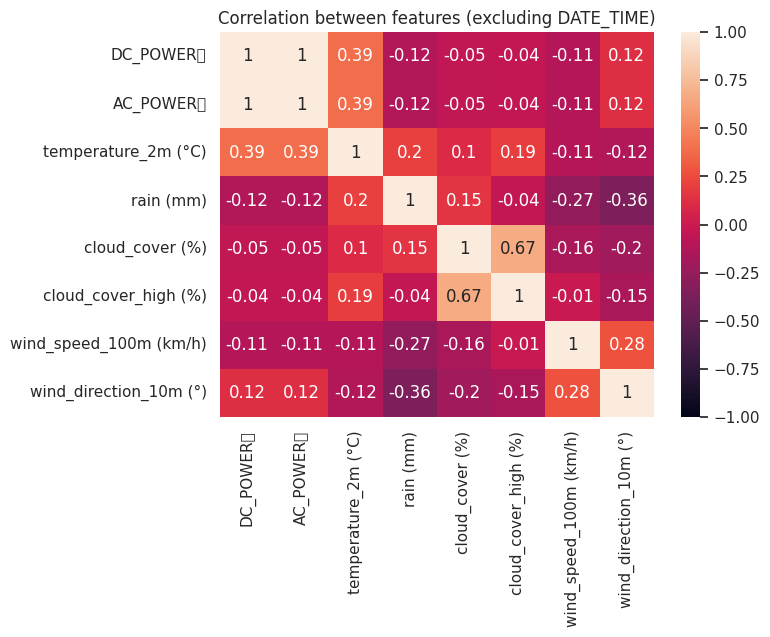

In [10]:
sns.set()

# Exclude 'DATE_TIME' from the correlation matrix
correlation_matrix = df.drop(columns=['DATE_TIME', 'DATE', 'TIME', 'DAY', 'MONTH', 'WEEK','HOURS', 'MINUTES',	'TOTAL MINUTES PASS', 'DATE_STRING']).corr()

# Create a heatmap of correlations
_, ax = plt.subplots(figsize=(7, 5))
heatmap = sns.heatmap(correlation_matrix.round(2), annot=True, vmin=-1, vmax=1, ax=ax)

# Set the title
heatmap.set_title("Correlation between features (excluding DATE_TIME)")

# Show the plot
plt.show()

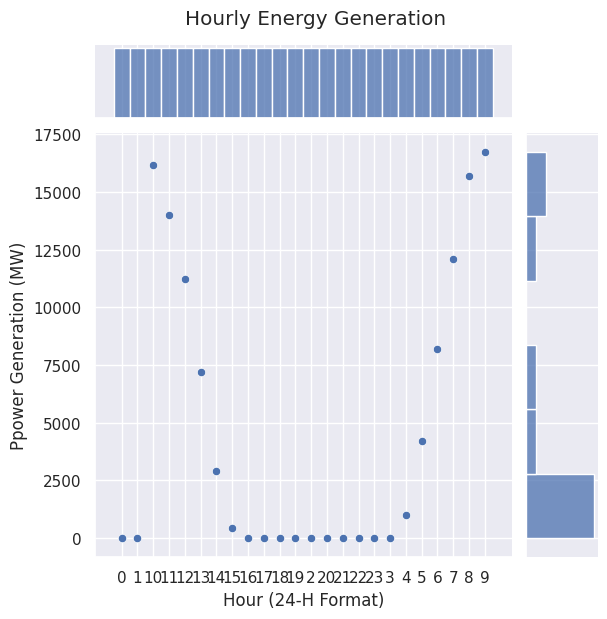

In [11]:
# check the effect of `hour` and `day_of_year` on the `SystemProduction`
sns.set()
g = sns.jointplot(data=df[["HOURS", "AC_POWER\t"]].groupby("HOURS").mean(), x="HOURS", y="AC_POWER\t")
g.set_axis_labels(xlabel=("Hour (24-H Format)"), # set x-label
                  ylabel=("Ppower Generation (MW)"))  # set y-label
g.fig.suptitle("Hourly Energy Generation", y=1.03);  # set the title

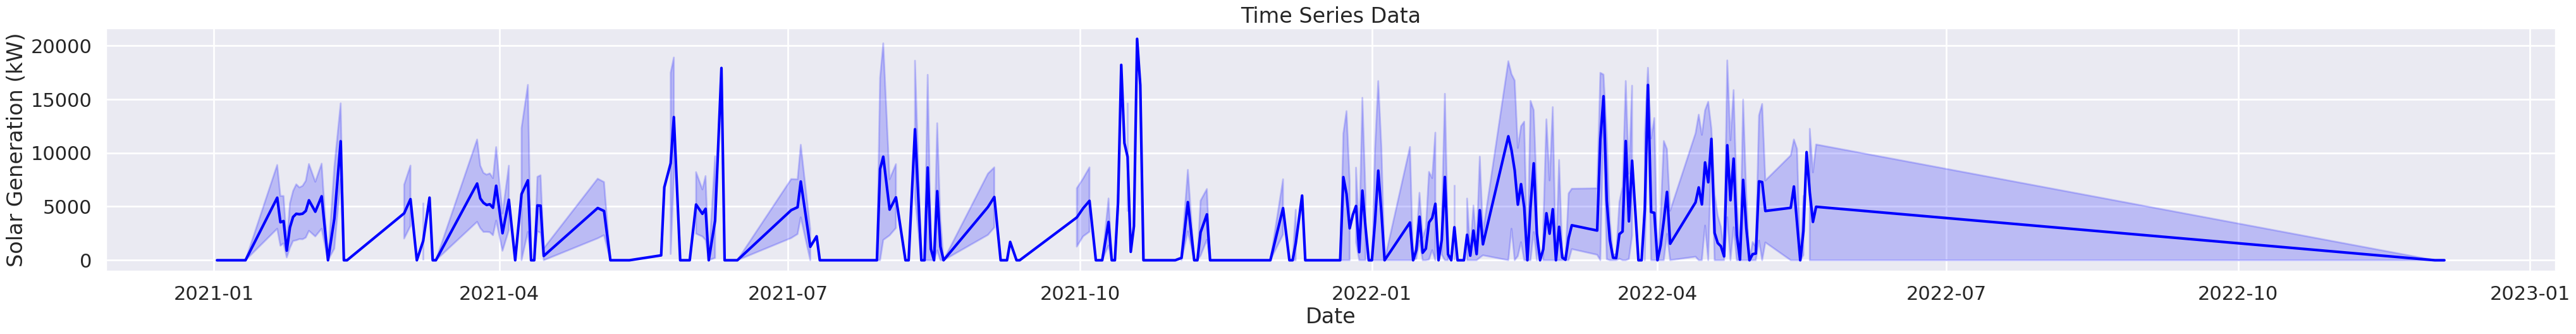

In [12]:
# plot the time series data
sns.set_context("poster")
plt.subplots(figsize=(50, 5)) # set the figure dimensions
sns.lineplot(x=df['DATE'], y=df['AC_POWER\t'], color="blue")

# set the labels and title
plt.xlabel("Date")
plt.ylabel("Solar Generation (kW)")
plt.title("Time Series Data");

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df.rename(columns={'AC_POWER\t': 'AC_POWER'}, inplace=True)

def prepare_data(df):
    '''Splits the dataset into (features (pre-defined), windows, horizon).'''

    to_split = df.copy(deep=True) # get a copy of `df`
    forecast = to_split.AC_POWER  # get the y-values
    to_split = to_split.shift(1)  # shift the features for the current hour to the next hour for forecasting
    to_split.rename({"AC_POWER": "SP_t_1"}, axis=1, inplace=True)  # rename the column for consistency
    to_split["forecast"] = forecast  # put the forecast back into the data frame that is to be split

    windows_per_hour = 12  # number of 5-minute intervals in an hour
    windows = 24 * windows_per_hour  # total number of 5-minute intervals in 24 hours

    # perform windowing
    for n in range(2, windows + 1, 1):
        to_split[f"SP_t_{n}"] = to_split.forecast.shift(n)
    to_split.dropna(inplace=True)

    # split the windows from `to-split` to `windows_df`
    window_cols = []
    windows_df = pd.DataFrame([], index=to_split.index)
    for col in to_split.columns:
        if "SP" in col: # where the window names are matched
            windows_df[f"{col}"] = to_split[f"{col}"]
            to_split.drop(col, axis=1, inplace=True)

    # get the features and horizon from `to_split` and save them
    columns = to_split.columns.values.tolist()
    other_feats, horizon = to_split[[cols for cols in columns if cols != "forecast"]], to_split["forecast"]

    return other_feats, windows_df, horizon

# get the three types of data
other_feats, windows, horizon = prepare_data(df)

# check the data types of each column
print("Data Types of Columns:")
print(other_feats.dtypes)

# Exclude non-numeric columns
non_numeric_columns = ['cloud_cover_low (%)', 'DATE_STRING', 'DATE_TIME','cloud_cover_mid (%)', 'DATE','TIME', 'HOURS']
numeric_columns = [col for col in other_feats.columns if col not in non_numeric_columns]

# Store the non-numeric columns separately
non_numeric_data = other_feats[non_numeric_columns]

# Remove non-numeric columns from other_feats
other_feats = other_feats.drop(columns=non_numeric_columns)

# Initialize the MinMaxScaler and transform the numeric features
scaler = MinMaxScaler()
other_feats_scaled = pd.DataFrame(scaler.fit_transform(other_feats), columns=numeric_columns)

# Concatenate the scaled numeric columns with the non-numeric columns
other_feats_scaled = pd.concat([other_feats_scaled, non_numeric_data], axis=1)

# get `other_feats_scaled` statistical summary
print(other_feats_scaled.describe())


Data Types of Columns:
DC_POWER\t                       float64
temperature_2m (°C)              float64
rain (mm)                        float64
cloud_cover (%)                  float64
cloud_cover_low (%)               object
cloud_cover_mid (%)               object
cloud_cover_high (%)             float64
wind_speed_100m (km/h)           float64
wind_direction_10m (°)           float64
DATE_TIME                 datetime64[ns]
DATE                              object
TIME                              object
DAY                              float64
MONTH                            float64
WEEK                             float64
HOURS                             object
MINUTES                          float64
TOTAL MINUTES PASS               float64
DATE_STRING                       object
dtype: object
        DC_POWER\t  temperature_2m (°C)    rain (mm)  cloud_cover (%)  \
count  1503.000000          1503.000000  1503.000000      1503.000000   
mean      0.162228             0.52381

In [14]:
num_rows = other_feats.shape[0]
print(f"Number of Rows in other_feats: {num_rows}")

Number of Rows in other_feats: 1503


In [15]:
pip install tensorflow


In [16]:
import tensorflow as tf

def prepare_dataset(other_feats, windows, horizon, cutoff_datetime=30000, only_splits=False):
    '''Splits into train-validation datasets and prepares those datasets into `tf.data.Dataset` format for efficient training and validation.'''

    # create a mask for splitting the data into train and validation datasets
    mask = (windows.index < cutoff_datetime)

    # get the other_feats splits
    X_train_other_feats, X_test_other_feats = other_feats[mask].to_numpy(), other_feats[~mask].to_numpy()

    # get the windows splits
    X_train_windows, X_test_windows = windows[mask].to_numpy(), windows[~mask].to_numpy()

    # get the horizon splits
    y_train_horizon, y_test_horizon = horizon[mask], horizon[~mask]

    # if only_splits==True the return only the splits without preparing the datasets for training
    if only_splits:
        return ((X_train_other_feats, X_test_other_feats), (X_train_windows, X_test_windows), (y_train_horizon, y_test_horizon))

    # else continue
    else:
        # expand the dimensions of horizon to (None, 1) and perform splits
        y_train_horizon, y_test_horizon = np.expand_dims(horizon[mask].to_numpy(), axis=1), np.expand_dims(horizon[~mask].to_numpy(), axis=1)

        # get the data into `tf.data.Dataset` format and create a data pipeline
        X_train = tf.data.Dataset.from_tensor_slices((X_train_windows, X_train_other_feats)) # get the inputs of our model ready
        y_train = tf.data.Dataset.from_tensor_slices(y_train_horizon) # outputs of the model
        train_dataset = tf.data.Dataset.zip((X_train, y_train)) # create the dataset
        train_dataset = train_dataset.batch(128).prefetch(tf.data.AUTOTUNE).cache()  # if we were using models like ARIMA then shuffling the dataset would've have been beyond toxic

        # perform the same operation but for testing data
        X_test = tf.data.Dataset.from_tensor_slices((X_test_windows, X_test_other_feats)) # get the inputs of our model ready
        y_test = tf.data.Dataset.from_tensor_slices(y_test_horizon) # outputs of the model
        test_dataset = tf.data.Dataset.zip((X_test, y_test)) # create the dataset
        test_dataset = test_dataset.batch(128).prefetch(tf.data.AUTOTUNE).cache() # this was an uneccessary step btw

        return train_dataset, test_dataset

In [17]:
df.columns

Index(['DC_POWER\t', 'AC_POWER', 'temperature_2m (°C)', 'rain (mm)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
       'cloud_cover_high (%)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'DATE_TIME', 'DATE', 'TIME', 'DAY', 'MONTH',
       'WEEK', 'HOURS', 'MINUTES', 'TOTAL MINUTES PASS', 'DATE_STRING'],
      dtype='object')

In [18]:
# get the train and test datasets
train_dataset, test_dataset = prepare_dataset(other_feats, windows, horizon)
train_dataset, test_dataset

(<CacheDataset element_spec=((TensorSpec(shape=(None, 288), dtype=tf.float64, name=None), TensorSpec(shape=(None, 12), dtype=tf.float64, name=None)), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>,
 <CacheDataset element_spec=((TensorSpec(shape=(None, 288), dtype=tf.float64, name=None), TensorSpec(shape=(None, 12), dtype=tf.float64, name=None)), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>)

In [19]:
# get only the train and test splits of horizon for visualization
_, _, (train_horizon, test_horizon) = prepare_dataset(other_feats, windows, horizon, only_splits=True)

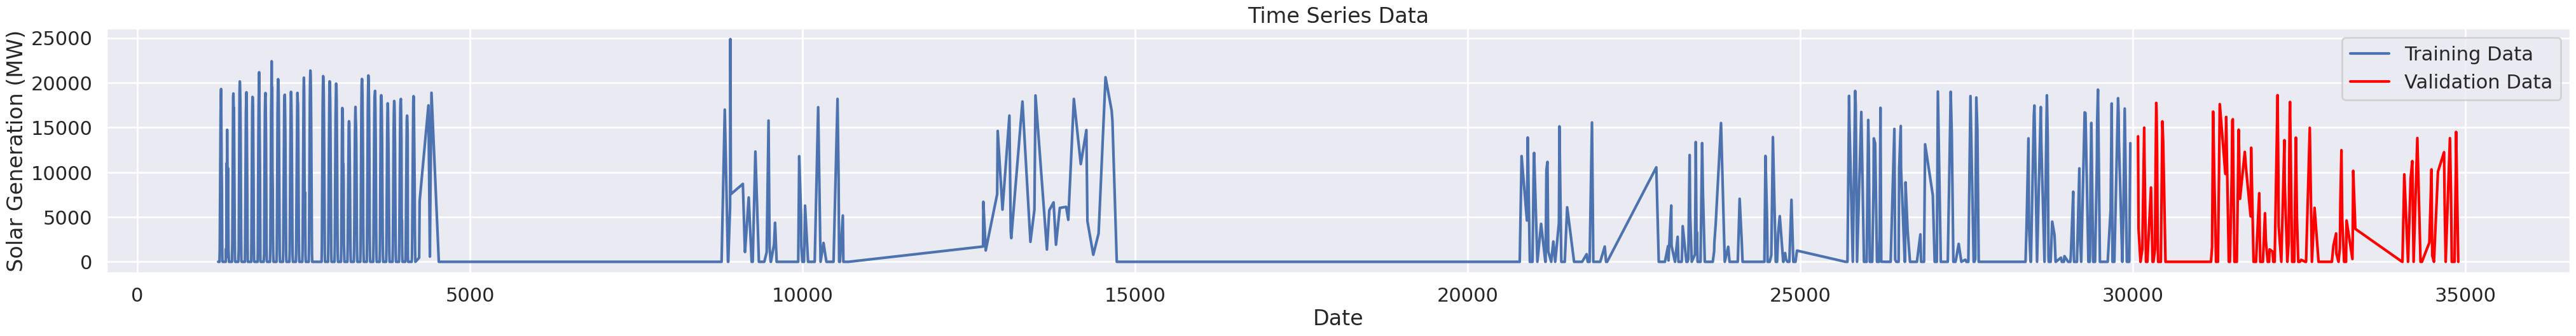

In [20]:
# plot the splits
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(50, 5))
sns.lineplot(x=train_horizon.index,y=train_horizon.values, label="Training Data", color="b", ax=ax)
sns.lineplot(x=test_horizon.index, y=test_horizon.values, color="red", label="Validation Data", ax=ax)

# set the axis labels and title
plt.xlabel("Date")
plt.ylabel("Solar Generation (MW)")
plt.title("Time Series Data");

In [21]:
pip install statsmodels


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


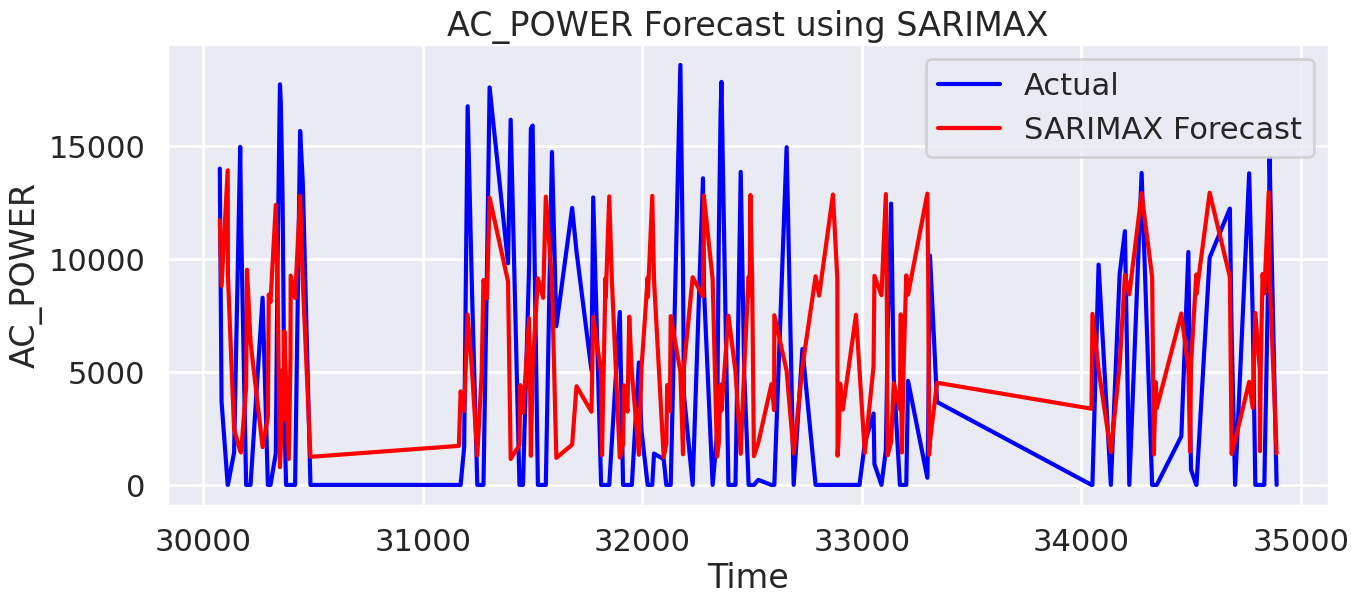

SARIMAX RMSE: 7084.3023477959505
SARIMAX MAE: 5980.418761443429
SARIMAX R-squared: -0.5479583080886823


In [22]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

def train_sarimax_model(train_data):
    # Fit SARIMAX model
    model = sm.tsa.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=False)
    return fitted_model

def evaluate_model(model, test_data):
    # Forecast
    forecast = model.get_forecast(steps=len(test_data))
    forecast_mean = forecast.predicted_mean

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test_data, forecast_mean))

    # Calculate MAE
    mae = mean_absolute_error(test_data, forecast_mean)

    # Calculate R-squared
    r2 = r2_score(test_data, forecast_mean)

    return forecast_mean, rmse, mae, r2

# Train SARIMAX model on the train dataset
sarimax_model = train_sarimax_model(train_horizon)

# Evaluate the model on the test dataset
sarimax_forecast, sarimax_rmse, sarimax_mae, sarimax_r2 = evaluate_model(sarimax_model, test_horizon)

# Plot the results
plt.figure(figsize=(15, 6))

# Plot actual values
plt.plot(test_horizon.index, test_horizon, label='Actual', color='blue')

# Plot forecasted values
plt.plot(test_horizon.index, sarimax_forecast, label='SARIMAX Forecast', color='red')

plt.title('AC_POWER Forecast using SARIMAX')
plt.xlabel('Time')
plt.ylabel('AC_POWER')
plt.legend()
plt.show()

print(f"SARIMAX RMSE: {sarimax_rmse}")
print(f"SARIMAX MAE: {sarimax_mae}")
print(f"SARIMAX R-squared: {sarimax_r2}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


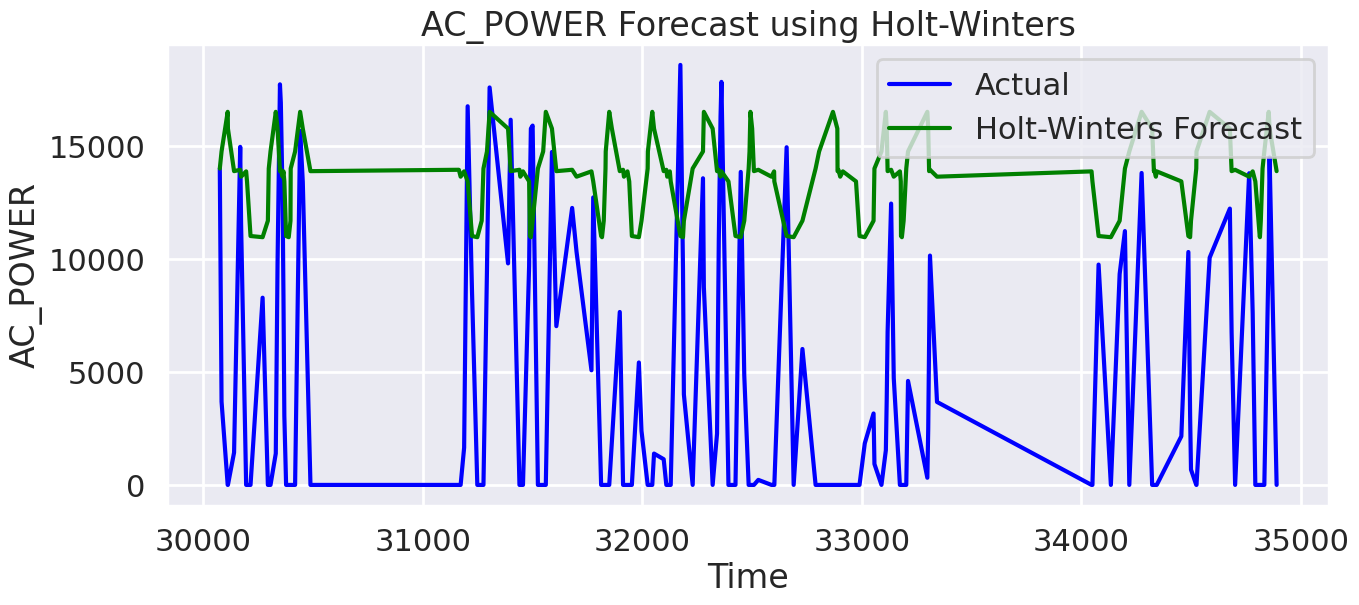

Holt-Winters RMSE: 11239.314406745807
Holt-Winters MAE: 10113.654204667871
Holt-Winters R-squared: -2.8962312384297624


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def train_holt_winters_model(train_data):
    # Fit Holt-Winters model
    model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
    fitted_model = model.fit()
    return fitted_model

# Train Holt-Winters model on the train dataset
holt_winters_model = train_holt_winters_model(train_horizon)

# Evaluate the model on the test dataset
holt_winters_forecast = holt_winters_model.forecast(steps=len(test_horizon))
holt_winters_forecast_mean = holt_winters_forecast

# Calculate RMSE
holt_winters_rmse = sqrt(mean_squared_error(test_horizon, holt_winters_forecast_mean))

# Calculate MAE
holt_winters_mae = mean_absolute_error(test_horizon, holt_winters_forecast_mean)

# Calculate R-squared
holt_winters_r2 = r2_score(test_horizon, holt_winters_forecast_mean)

# Plot the results
plt.figure(figsize=(15, 6))

# Plot actual values
plt.plot(test_horizon.index, test_horizon, label='Actual', color='blue')

# Plot forecasted values
plt.plot(test_horizon.index, holt_winters_forecast_mean, label='Holt-Winters Forecast', color='green')

plt.title('AC_POWER Forecast using Holt-Winters')
plt.xlabel('Time')
plt.ylabel('AC_POWER')
plt.legend()
plt.show()

print(f"Holt-Winters RMSE: {holt_winters_rmse}")
print(f"Holt-Winters MAE: {holt_winters_mae}")
print(f"Holt-Winters R-squared: {holt_winters_r2}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


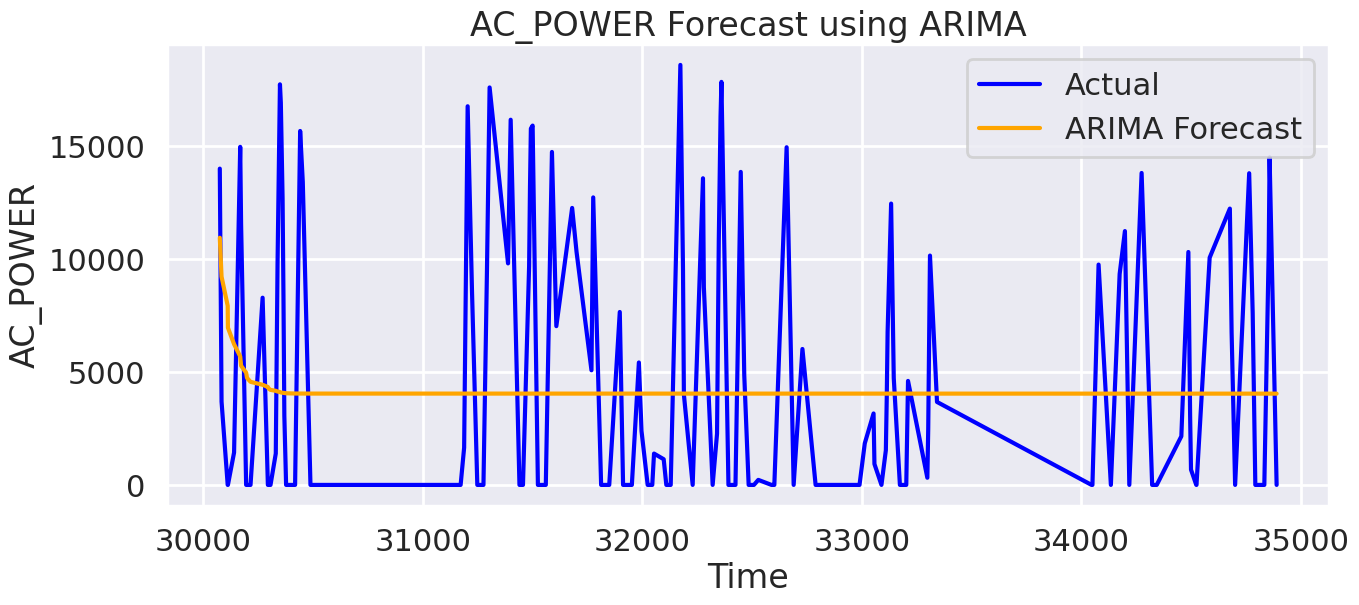

ARIMA RMSE: 5695.567238888902
ARIMA MAE: 4917.629841938001
ARIMA R-squared: -0.0005505845959081768


In [24]:
from statsmodels.tsa.arima.model import ARIMA

def train_arima_model(train_data):
    # Fit ARIMA model
    model = ARIMA(train_data, order=(1, 1, 1))  # Adjust order as needed
    fitted_model = model.fit()
    return fitted_model

# Train ARIMA model on the train dataset
arima_model = train_arima_model(train_horizon)

# Evaluate the model on the test dataset
arima_forecast = arima_model.get_forecast(steps=len(test_horizon))
arima_forecast_mean = arima_forecast.predicted_mean

# Calculate RMSE
arima_rmse = sqrt(mean_squared_error(test_horizon, arima_forecast_mean))

# Calculate MAE
arima_mae = mean_absolute_error(test_horizon, arima_forecast_mean)

# Calculate R-squared
arima_r2 = r2_score(test_horizon, arima_forecast_mean)

# Plot the results
plt.figure(figsize=(15, 6))

# Plot actual values
plt.plot(test_horizon.index, test_horizon, label='Actual', color='blue')

# Plot forecasted values
plt.plot(test_horizon.index, arima_forecast_mean, label='ARIMA Forecast', color='orange')

plt.title('AC_POWER Forecast using ARIMA')
plt.xlabel('Time')
plt.ylabel('AC_POWER')
plt.legend()
plt.show()

print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA R-squared: {arima_r2}")


Epoch 1/100
1329/1329 - 6s - loss: 27674346.0000 - 6s/epoch - 4ms/step
Epoch 2/100
1329/1329 - 4s - loss: 19196402.0000 - 4s/epoch - 3ms/step
Epoch 3/100
1329/1329 - 5s - loss: 19147834.0000 - 5s/epoch - 4ms/step
Epoch 4/100
1329/1329 - 7s - loss: 19295594.0000 - 7s/epoch - 5ms/step
Epoch 5/100
1329/1329 - 6s - loss: 19231550.0000 - 6s/epoch - 4ms/step
Epoch 6/100
1329/1329 - 7s - loss: 19254526.0000 - 7s/epoch - 5ms/step
Epoch 7/100
1329/1329 - 6s - loss: 19300610.0000 - 6s/epoch - 4ms/step
Epoch 8/100
1329/1329 - 5s - loss: 19289688.0000 - 5s/epoch - 3ms/step
Epoch 9/100
1329/1329 - 7s - loss: 19168068.0000 - 7s/epoch - 5ms/step
Epoch 10/100
1329/1329 - 4s - loss: 19293310.0000 - 4s/epoch - 3ms/step
Epoch 11/100
1329/1329 - 5s - loss: 19060148.0000 - 5s/epoch - 4ms/step
Epoch 12/100
1329/1329 - 4s - loss: 19278470.0000 - 4s/epoch - 3ms/step
Epoch 13/100
1329/1329 - 3s - loss: 19163864.0000 - 3s/epoch - 2ms/step
Epoch 14/100
1329/1329 - 3s - loss: 19246738.0000 - 3s/epoch - 2ms/step
E

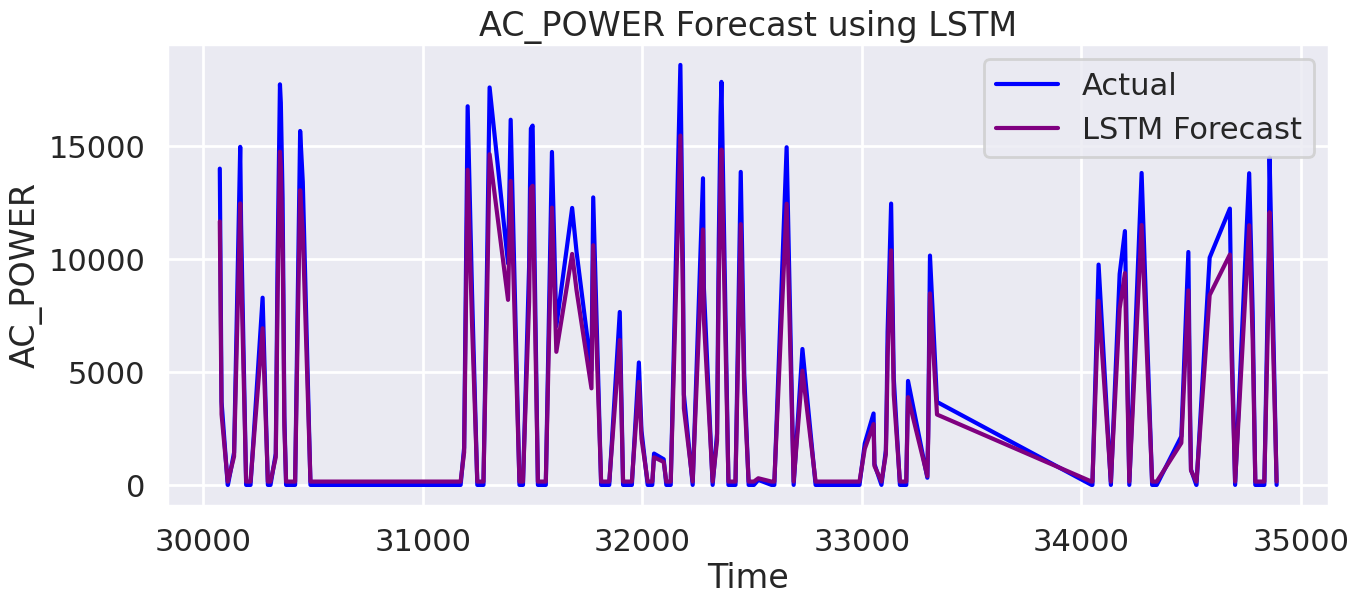

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def train_lstm_model(train_data):
    # Assuming train_data is a 1D array or pandas Series
    train_data = np.array(train_data).reshape(-1, 1)

    # Create sequences of data for LSTM
    X, y = [], []
    for i in range(len(train_data)-1):
        X.append(train_data[i])
        y.append(train_data[i+1])
    X, y = np.array(X), np.array(y)

    # Reshape input for LSTM [samples, timesteps, features]
    X = X.reshape(X.shape[0], 1, 1)

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X, y, epochs=100, batch_size=1, verbose=2)

    return model

# Assuming train_horizon is a pandas Series
lstm_model = train_lstm_model(train_horizon)

# Forecast using the trained LSTM model
lstm_forecast = lstm_model.predict(np.array(test_horizon).reshape(-1, 1))
lstm_forecast = lstm_forecast.flatten()

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(test_horizon.index, test_horizon, label='Actual', color='blue')
plt.plot(test_horizon.index, lstm_forecast, label='LSTM Forecast', color='purple')
plt.title('AC_POWER Forecast using LSTM')
plt.xlabel('Time')
plt.ylabel('AC_POWER')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming test_horizon is the true values for the test period

# Flatten the true values for consistency
true_values = np.array(test_horizon).flatten()

# Calculate LSTM forecast
lstm_forecast = lstm_model.predict(np.array(test_horizon).reshape(-1, 1))
lstm_forecast = lstm_forecast.flatten()

# Calculate R-squared
r2_lstm = r2_score(true_values, lstm_forecast)

# Calculate RMSE
rmse_lstm = sqrt(mean_squared_error(true_values, lstm_forecast))

# Calculate MAE
mae_lstm = mean_absolute_error(true_values, lstm_forecast)

print(f"LSTM R-squared: {r2_lstm}")
print(f"LSTM RMSE: {rmse_lstm}")
print(f"LSTM MAE: {mae_lstm}")


6/6 [==============================] - 0s 3ms/step
LSTM R-squared: 0.9577394820806598
LSTM RMSE: 1170.5362448055514
LSTM MAE: 751.7980720652321


In [27]:
import io, os, sys, setuptools, tokenize


In [28]:
import pandas as pd

# Assuming test_horizon is a pandas Series
actual_values = pd.DataFrame({'Time': test_horizon.index, 'Actual': test_horizon.values})

# Make predictions using the trained LSTM model
lstm_forecast = lstm_model.predict(np.array(test_horizon).reshape(-1, 1))
lstm_forecast = lstm_forecast.flatten()

# Create a DataFrame for predictions
predictions = pd.DataFrame({'Time': test_horizon.index, 'LSTM Forecast': lstm_forecast})

# Merge actual values and predictions on the 'Time' column
result_df = pd.merge(actual_values, predictions, on='Time')

# Display the result DataFrame
print(result_df)


6/6 [==============================] - 0s 3ms/step
      Time   Actual  LSTM Forecast
0    30076  14009.0   11670.771484
1    30084   3689.0    3128.611084
2    30112      0.0     148.341064
3    30113      0.0     148.341064
4    30141   1434.0    1262.082764
..     ...      ...            ...
168  34826      0.0     148.341064
169  34834      0.0     148.341064
170  34854  10387.0    8672.738281
171  34858  14499.0   12076.359375
172  34890      0.0     148.341064

[173 rows x 3 columns]


In [29]:
# parameters for n-beats block
N_EPOCHS = 5000  # number of training cycles that will be formed on the whole dataset
N_NEURONS = 512  # for hidden layers of n-beats block
N_LAYERS = 4  # number of hidden layers for n-beats block
N_STACKS = 30  # total number of stacks of n-beats block
WINDOW_SIZE = 5  # adjust the window size for 5-hour intervals
HORIZON = 1  # forecast 1 horizon (5 hours) into the future

INPUT_SIZE = WINDOW_SIZE * HORIZON  # input size used to get the backcast
THETA_SIZE = INPUT_SIZE + HORIZON  # output of the n-beats block from which the backcast and forecast are extracted

# check the shapes
INPUT_SIZE, THETA_SIZE


(5, 6)

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs): # the call method is what runs when the layer is called
        x = inputs
        for layer in self.hidden: # pass inputs through each hidden layer
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

        return backcast, forecast

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # create a network of stacks with len(N_STACKS-1) as first stack was initialized earlier

    # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
    )(residuals) # pass it in residuals (the backcast)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# build n-beats model that will be merged with another smaller model
model_1 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_1_N-BEATS")

# check model summary
model_1.summary()

Model: "model_1_N-BEATS"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 stack_input (InputLayer)    [(None, 5)]                  0         []                            
                                                                                                  
 InitialBlock (NBeatsBlock)  ((None, 5),                  794118    ['stack_input[0][0]']         
                              (None, 1))                                                          
                                                                                                  
 subtract_00 (Subtract)      (None, 5)                    0         ['stack_input[0][0]',         
                                                                     'InitialBlock[0][0]']        
                                                                                    

In [31]:
# build the second model
model_2 = tf.keras.Sequential([
    layers.Input(shape=(8,), name="input_2"),
    layers.Dense(16),
    layers.LeakyReLU(), # choose leaky-relu empirically
    layers.Dense(8),
    layers.LeakyReLU(),  # choose leaky-relu empirically
    layers.Dense(8),
])

# check model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 16)                144       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_122 (Dense)           (None, 8)                 136       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8)                 0         
                                                                 
 dense_123 (Dense)           (None, 8)                 72        
                                                                 
Total params: 352 (1.38 KB)
Trainable params: 352 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# building the final model by combining `model_1` and `model_2`
output = layers.Concatenate()([model_1.output, model_2.output])
output = layers.Dense(1)(output)
output = layers.LeakyReLU()(output)  # ReLU activation wasn't used because it might be detrimental to model training during gradient descent
model = tf.keras.Model(inputs=[model_1.input, model_2.input], outputs=output)  # two inputs from two previous models and a single output that will be our forecast

# check model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 stack_input (InputLayer)    [(None, 5)]                  0         []                            
                                                                                                  
 InitialBlock (NBeatsBlock)  ((None, 5),                  794118    ['stack_input[0][0]']         
                              (None, 1))                                                          
                                                                                                  
 subtract_00 (Subtract)      (None, 5)                    0         ['stack_input[0][0]',         
                                                                     'InitialBlock[0][0]']        
                                                                                              

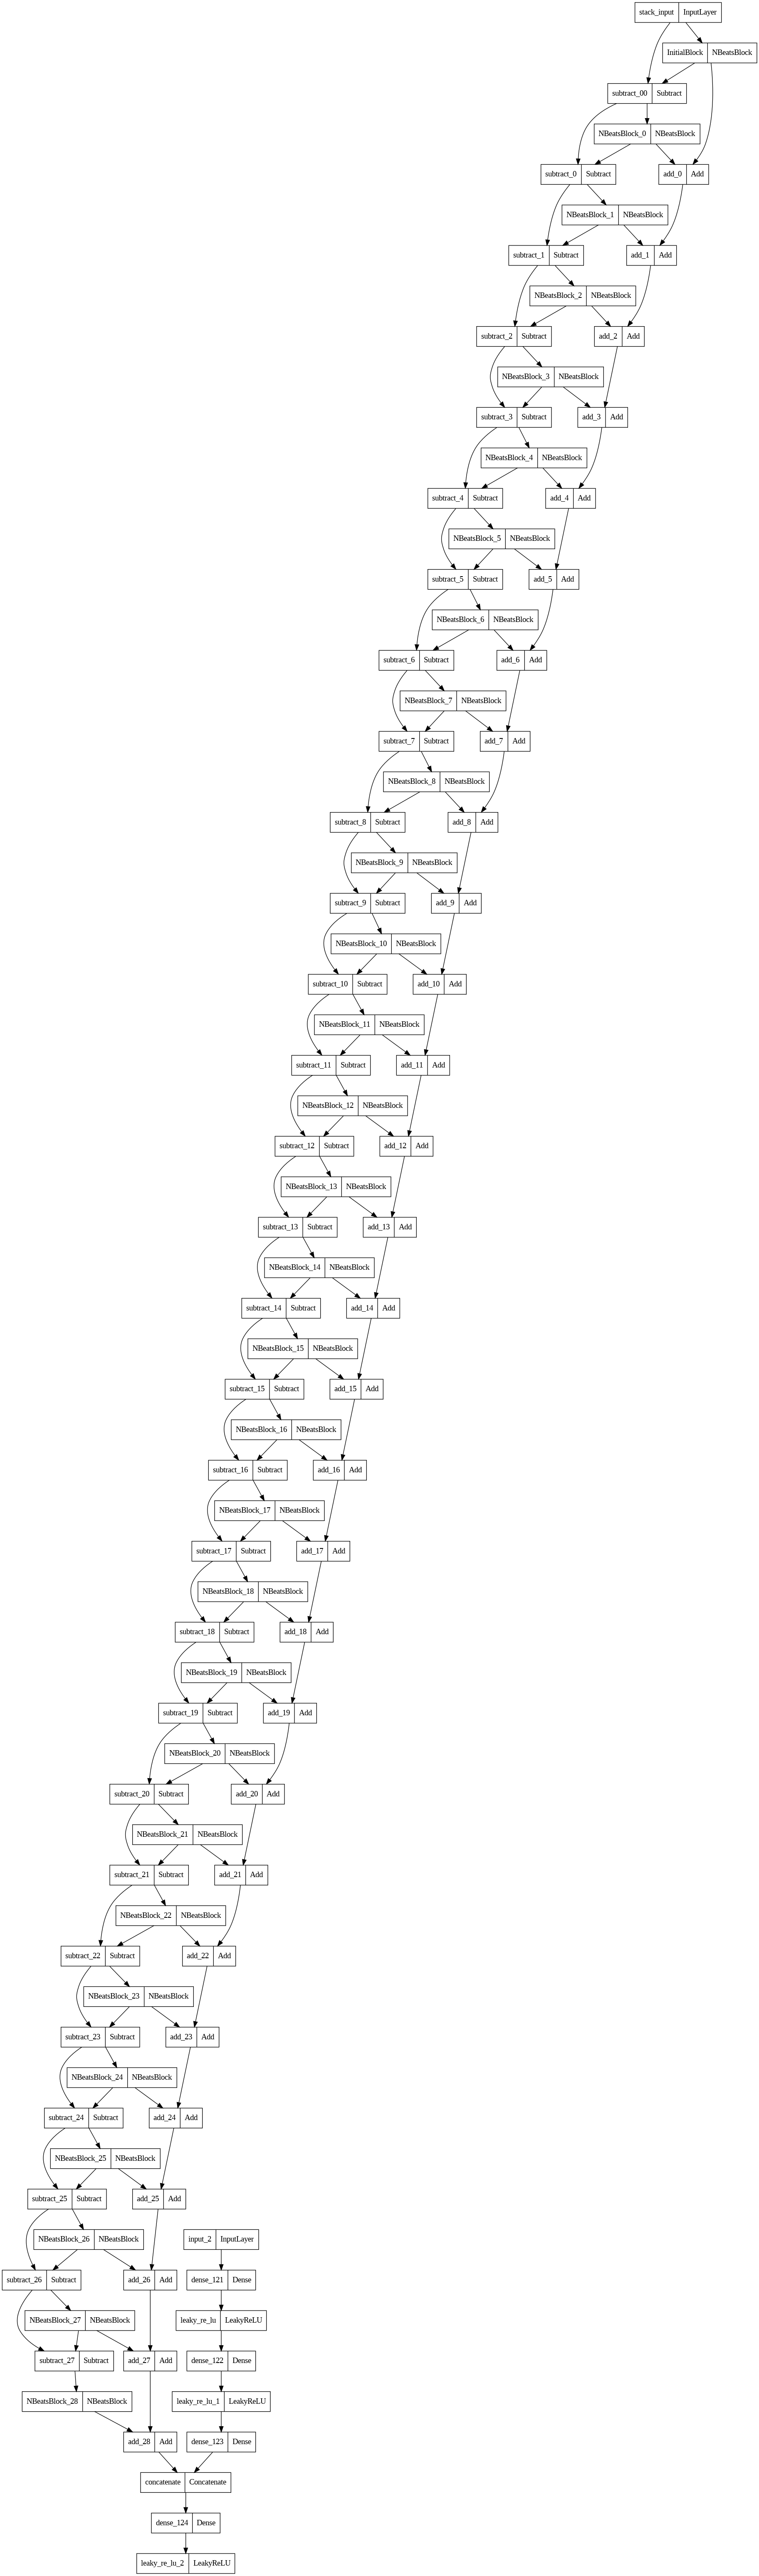

In [33]:
# plot the model
tf.keras.utils.plot_model(model)